<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/FDDT_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('/content/drive/MyDrive/FDDT AUC (2).xlsx')
df.shape
df.columns

Index(['Ext_DCR(Post op 3 months_OA )', 'Post op 3month FDDT (Ext)'], dtype='object')

In [5]:
df.columns

Index(['test1', 'passed', 'test2', 'passed.1'], dtype='object')

In [15]:
x = df.drop(['Post op 3month FDDT (Ext)'], axis=1).values
y = df['Post op 3month FDDT (Ext)'].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [23]:
logy_pred = logmodel.predict(x_test)
logy_pred

array([0, 1, 0, 1, 1])

In [24]:
logy_pred[logy_pred<=0.5]=0
logy_pred[logy_pred>0.5]=1

In [25]:
from sklearn import metrics
metrics.confusion_matrix(y_test, logy_pred)


array([[1, 0],
       [1, 3]])

In [26]:
metrics.accuracy_score(y_test, logy_pred)

0.8

In [28]:
metrics.roc_auc_score(y_test, logy_pred)

0.875

In [29]:
print(metrics.classification_report(y_test, logy_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



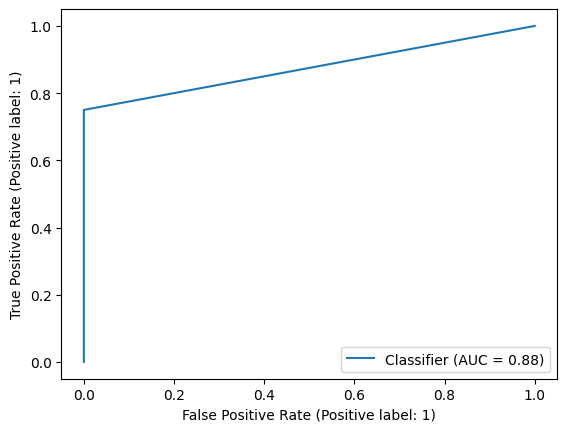

In [30]:
metrics.RocCurveDisplay.from_predictions(y_test, logy_pred)

In [31]:
import openpyxl
df = openpyxl.load_workbook('/content/drive/MyDrive/FDDT AUC (5).xlsx')
df.sheetnames

['EXT DCR POST OP 3months FDDT', 'Endo dcr post op 3 month FDDT']

In [40]:
# Read the Excel files
df1 = pd.read_excel('/content/drive/MyDrive/FDDT AUC (5).xlsx', sheet_name='Fddt')


df1.columns

ValueError: Worksheet named 'Fddt' not found

In [ ]:
X_train = df1[['test1']]  # Features from dataset 1
y_train = df1['passed']            # Target variable from dataset 1

X_test = df1[['test2']]   # Features from dataset 2
y_test = df1['passed']             # Target variable from dataset 2

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Assuming df1 contains both 'test1' and 'test2' columns
X_train = df1[['test2']]  # Features for training
y_train = df1['passed']   # Target for training

X_test = df1[['test2']]   # Use the same feature name 'test1' for testing
y_test = df1['passed']   # Target for testing

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Now prediction should work

In [ ]:
model.score(X_test, y_test)

1.0